In [1]:
import lxml.etree
import os
import re
import pandas as pd
import numpy as np
from collections import Counter
# !pip install spacy
# !pip install stanza
import stanza
import matplotlib.pyplot as plt
import spacy
# nlp = spacy.load('en_core_web_sm')
import os
plt.style.use('ggplot')
from tqdm import tqdm
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
nlp = stanza.Pipeline(lang='en', processors='tokenize,mwt,pos')

2021-08-23 08:22:26 WARNING: Can not find mwt: default from official model list. Ignoring it.
2021-08-23 08:22:26 INFO: Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |
| pos       | combined |

2021-08-23 08:22:26 INFO: Use device: cpu
2021-08-23 08:22:26 INFO: Loading: tokenize
2021-08-23 08:22:26 INFO: Loading: pos
2021-08-23 08:22:26 INFO: Done loading processors!


In [3]:
metadata_df = pd.read_csv('pratchett_metadata.csv')
metadata_df = metadata_df[metadata_df.YA == False].reset_index(drop=True)
metadata_df.untokenized_text[0][0:200]

'In A distant and secondhand set of dimensions, in an astral plane that was never meant to fly, the curling star-mists waver and part... See... Great ATuin the turtle comes, swimming slowly through the'

# 1. Spatial preposition token rates from full texts

In [100]:
# Define list of spatial prepositions
spatial_prep_list = ['aboard', 'above', 'across', 'against', 'along', 'amid', 'among', 'around', 'atop', 'behind', 'below', 
                    'beneath', 'beside', 'between', 'beyond', 'down', 'inside', 'near', 'onto', 'out', 'through', 'under',
                    'upon', 'within']

In [101]:
# Get list of spatial preposition token rates
spatial_prep_rate = []
for text in metadata_df.text:
    word_count = 0
    word_dict = Counter(text.split())

    for word in spatial_prep_list:
        word_count += word_dict[word]
    spatial_prep_rate.append(word_count/len(text.split()))

Text(0.5, 0, 'Age at publication (years)')

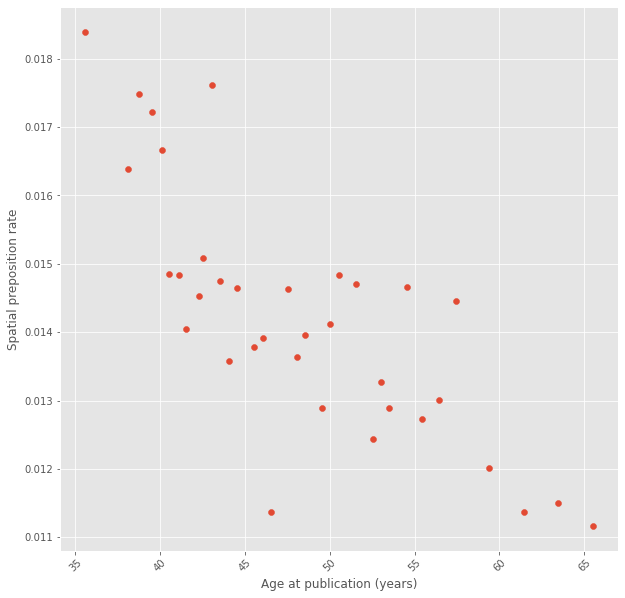

In [102]:
# Plot rates of spatial preposition tokens
f, ax = plt.subplots(figsize=(10,10))

ax.scatter(metadata_df.age_at_publication, spatial_prep_rate)


plt.xticks(rotation=45);
ax.set_ylabel('Spatial preposition rate')

ax.set_xlabel('Age at publication (years)')

# 2. Number word rates from full texts

In [103]:
# Test stanza's feats
doc = nlp("I saw about three to six dogs yesterday.")
for sent in doc.sentences:
        for word in sent.words:
            if word.feats == 'NumType=Card':
                print(word.text, word.feats)

three NumType=Card
six NumType=Card


In [105]:
metadata_df.columns

Index(['title', 'year_of_publication', 'age_at_publication', 'YA',
       'number_of_words', 'text', 'untokenized_text'],
      dtype='object')

In [106]:
num_rates = []
    
# Count the number of tokens with the feature numtype=card (cardinal numbers)
# Divide by the number of words in the full texts
for i in tqdm(range(metadata_df.shape[0])):
    text = metadata_df.loc[i, 'untokenized_text']
    count = 0
    doc = nlp(text)
    for sent in tqdm(doc.sentences):
        for word in sent.words:
            if word.feats == 'NumType=Card':
                count += 1
    num_rates.append(count/metadata_df.loc[i, 'number_of_words'])

100%|███████████████████████████████████████████████████████████████████████████████| 35/35 [2:03:52<00:00, 212.36s/it]


Text(0.5, 0, 'Age at publication (years)')

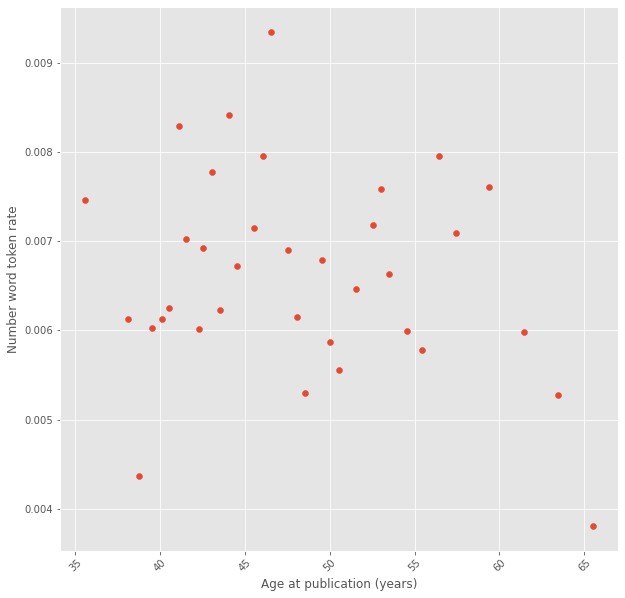

In [107]:
f, ax = plt.subplots(figsize=(10,10))

ax.scatter(metadata_df.age_at_publication, num_rates)


plt.xticks(rotation=45);
ax.set_ylabel('Number word token rate')

ax.set_xlabel('Age at publication (years)')

# 3. Color word rates from full texts

In [78]:
# Define list of common color words

color_list = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet',
              'purple', 'pink', 'beige', 'brown', 'grey',
              'gray', 'black', 'white']

In [81]:
color_rate = []
for text in metadata_df.text:
    word_count = 0
    word_dict = Counter(text.split())

    for word in color_list:
        word_count += word_dict[word]
    color_rate.append(word_count/len(text.split()))

Text(0.5, 0, 'Age at publication (years)')

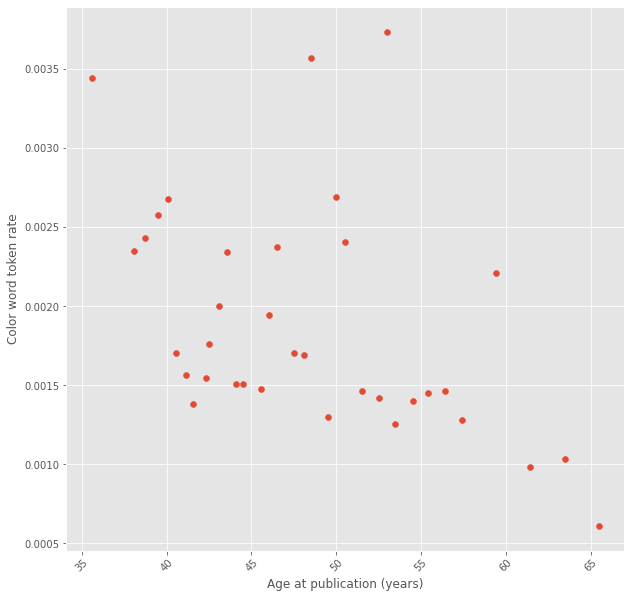

In [82]:
# Plot rates of color word tokens
f, ax = plt.subplots(figsize=(10,10))

ax.scatter(metadata_df.age_at_publication, color_rate)


plt.xticks(rotation=45);
ax.set_ylabel('Color word token rate')

ax.set_xlabel('Age at publication (years)')

# 4. Function word rates from full texts

In [83]:
# Get 300 most common words - a large percentage will be function words
mostcommon_300 = Counter(" ".join(metadata_df["text"]).split()).most_common(300)

mostcommon300_list = [item[0] for item in mostcommon_300]

In [36]:
# Write function words to a file, and manually annotate content words with a '#' in front
# with open('mostcommon300list.txt', 'w') as f:
#     for item in sorted(mostcommon300_list):
#         f.write(item + "\n")

In [84]:
with open('mostcommon300list.txt', 'r') as f:
    commonlist = f.read().split('\n')
commonlist

['a',
 'about',
 'across',
 '#added',
 'after',
 'again',
 'against',
 'ah',
 '#air',
 'all',
 'along',
 'always',
 'am',
 'an',
 'and',
 '#ankh',
 'another',
 'any',
 'anyone',
 'anything',
 'anyway',
 'are',
 'around',
 'as',
 'at',
 'away',
 'back',
 '#bad',
 'be',
 'because',
 'been',
 'before',
 '#began',
 'behind',
 'being',
 '#believe',
 '#better',
 '#big',
 '#bit',
 '#black',
 'but',
 'by',
 'ca',
 '#came',
 'can',
 '#captain',
 '#carrot',
 '#city',
 '#colon',
 '#come',
 'could',
 '#course',
 'd',
 '#day',
 '#dead',
 '#death',
 'did',
 'do',
 'does',
 'doing',
 'done',
 '#door',
 'down',
 'else',
 '#end',
 'enough',
 'er',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 '#eyes',
 '#face',
 '#fact',
 '#far',
 '#feet',
 '#felt',
 'few',
 '#find',
 '#first',
 'for',
 '#found',
 'from',
 'front',
 '#full',
 '#gave',
 '#get',
 '#give',
 '#go',
 '#going',
 '#good',
 '#got',
 '#granny',
 '#great',
 'had',
 '#half',
 '#hand',
 '#hands',
 '#hard',
 'has',
 'have',
 'he',
 '#hea

In [85]:
", ".join(commonlist)

'a, about, across, #added, after, again, against, ah, #air, all, along, always, am, an, and, #ankh, another, any, anyone, anything, anyway, are, around, as, at, away, back, #bad, be, because, been, before, #began, behind, being, #believe, #better, #big, #bit, #black, but, by, ca, #came, can, #captain, #carrot, #city, #colon, #come, could, #course, d, #day, #dead, #death, did, do, does, doing, done, #door, down, else, #end, enough, er, even, ever, every, everyone, everything, #eyes, #face, #fact, #far, #feet, #felt, few, #find, #first, for, #found, from, front, #full, #gave, #get, #give, #go, #going, #good, #got, #granny, #great, had, #half, #hand, #hands, #hard, has, have, he, #head, #heard, her, here, him, himself, his, how, i, if, in, into, is, it, its, just, #keep, #kind, #king, #knew, #know, #lady, #last, #least, #left, let, #life, #light, like, #little, ll, #long, #look, #looked, #looking, #lord, lot, m, #made, #magic, #magrat, #make, #man, many, me, #mean, #men, might, #mind, #mi

In [86]:
# Get rid of content words

function_words = [item for item in commonlist if not item.startswith('#')]
print(len(function_words))
function_words

159


['a',
 'about',
 'across',
 'after',
 'again',
 'against',
 'ah',
 'all',
 'along',
 'always',
 'am',
 'an',
 'and',
 'another',
 'any',
 'anyone',
 'anything',
 'anyway',
 'are',
 'around',
 'as',
 'at',
 'away',
 'back',
 'be',
 'because',
 'been',
 'before',
 'behind',
 'being',
 'but',
 'by',
 'ca',
 'can',
 'could',
 'd',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'else',
 'enough',
 'er',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'few',
 'for',
 'from',
 'front',
 'had',
 'has',
 'have',
 'he',
 'her',
 'here',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'it',
 'its',
 'just',
 'let',
 'like',
 'll',
 'lot',
 'm',
 'many',
 'me',
 'might',
 'more',
 'most',
 'much',
 'must',
 'my',
 'never',
 'no',
 'not',
 'nothing',
 'now',
 'nt',
 'of',
 'off',
 'oh',
 'on',
 'once',
 'one',
 'only',
 'or',
 'other',
 'our',
 'out',
 'over',
 'own',
 'probably',
 'quite',
 'rather',
 're',
 'really',
 's',
 'same',
 'she',
 'should',
 'so',

In [87]:
# Get rid of empty strings and words that are in the spatial preposition list

function_words = [item for item in function_words if not item in spatial_prep_list and len(item) !=0]
print(function_words)
len(function_words)

['a', 'about', 'after', 'again', 'ah', 'all', 'always', 'am', 'an', 'and', 'another', 'any', 'anyone', 'anything', 'anyway', 'are', 'as', 'at', 'away', 'back', 'be', 'because', 'been', 'before', 'being', 'but', 'by', 'ca', 'can', 'could', 'd', 'did', 'do', 'does', 'doing', 'done', 'else', 'enough', 'er', 'even', 'ever', 'every', 'everyone', 'everything', 'few', 'for', 'from', 'front', 'had', 'has', 'have', 'he', 'her', 'here', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'it', 'its', 'just', 'let', 'like', 'll', 'lot', 'm', 'many', 'me', 'might', 'more', 'most', 'much', 'must', 'my', 'never', 'no', 'not', 'nothing', 'now', 'nt', 'of', 'off', 'oh', 'on', 'once', 'one', 'only', 'or', 'other', 'our', 'over', 'own', 'probably', 'quite', 'rather', 're', 'really', 's', 'same', 'she', 'should', 'so', 'some', 'someone', 'something', 'sorry', 'still', 'sure', 'than', 'that', 'the', 'their', 'them', 'then', 'there', 'these', 'they', 'this', 'those', 'though', 'to', 'too', 'unti

150

In [88]:
# Get rates of function words in each book from full texts

func_rate = []
for text in metadata_df.text:
    word_count = 0
    word_dict = Counter(text.split())

    for word in function_words:
        word_count += word_dict[word]
    func_rate.append(word_count/len(text.split()))

Text(0.5, 0, 'Age at publication (years)')

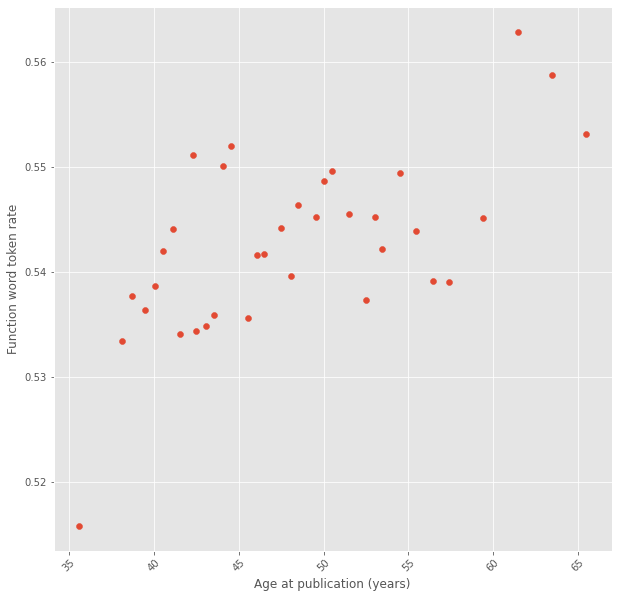

In [89]:
# Plot rates of function word tokens
f, ax = plt.subplots(figsize=(10,10))

ax.scatter(metadata_df.age_at_publication, func_rate)


plt.xticks(rotation=45);
ax.set_ylabel('Function word token rate')

ax.set_xlabel('Age at publication (years)')

# 5. Form word rates from full texts

In [90]:
# Define list of words related to form
form_list = ['angular', 'arc', 'asymmetrical', 'bulbous', 'chunky', 'circle', 'circular', 'concave', 'concentric', 
             'contorted', 'contoured', 'convex', 'corrugated', 'cube', 'cuboid', 'curly', 'curved', 'curvy',
             'cylinder', 'cylindrical', 'dot', 'ellipse', 'flat', 'forked', 'geometric', 
             'globular', 'grid', 'hexagon', 'misshapen', 'octagon', 'octagonal', 'oval', 'pointy', 'polygon', 'rectangle', 'rectangular',
             'round', 'solid', 'sphere', 'spherical', 'square', 'straight', 'symmetrical', 'tapered', 'tapering', 'triangle', 'triangular',
             'twisted', 'wedge'
]

In [93]:
# Get rates of form word tokens in each book from full texts
form_rate = []
for text in metadata_df.text:
    word_count = 0
    word_dict = Counter(text.split())

    for word in form_list:
        word_count += word_dict[word]
    form_rate.append(word_count/len(text.split()))

Text(0.5, 0, 'Age at publication (years)')

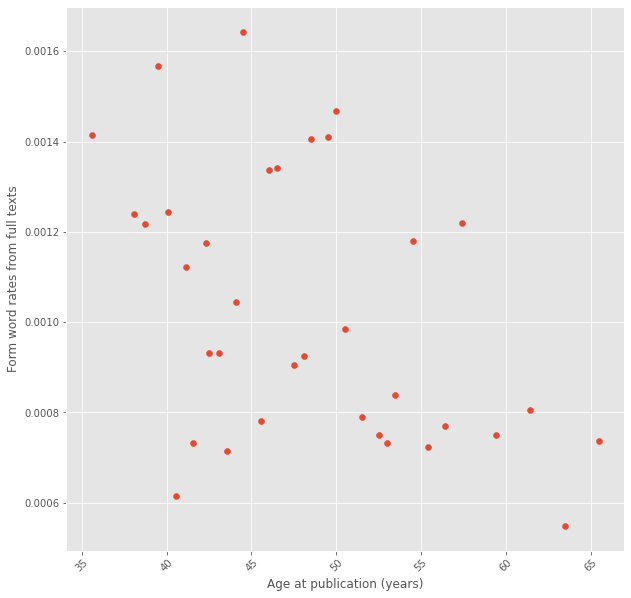

In [94]:
# Plot rates of form word tokens
f, ax = plt.subplots(figsize=(10,10))

ax.scatter(metadata_df.age_at_publication, form_rate)


plt.xticks(rotation=45);
ax.set_ylabel('Form word rates from full texts')

ax.set_xlabel('Age at publication (years)')

# 6. Save dataframe for significance testing

In [108]:
metadata_df['spatial_preprate'] = spatial_prep_rate
metadata_df['num_rate'] = num_rates
metadata_df['func_rate'] = func_rate
metadata_df['color_rate'] = color_rate
metadata_df['form_rate'] = form_rate

In [110]:
notext = metadata_df.drop(['text', 'untokenized_text'], axis=1)
print(notext.shape)
notext.columns

(35, 10)


Index(['title', 'year_of_publication', 'age_at_publication', 'YA',
       'number_of_words', 'spatial_preprate', 'num_rate', 'func_rate',
       'color_rate', 'form_rate'],
      dtype='object')

In [111]:
os.chdir('C:/Users/Dora Sperling/Desktop/Thesis')
notext.to_csv('3-lexicosemantic_wordcategory.csv', encoding='utf8', index=False)